In [3]:
import gymnasium as gym
import time

# Create the environment
env = gym.make("CartPole-v1", render_mode="human")

# Reset the environment to start
observation, info = env.reset(seed=42)

# Run the environment for 1000 steps or until it's done
for _ in range(1000):
    # Take a random action
    action = env.action_space.sample()
    
    # Step the environment
    observation, reward, terminated, truncated, info = env.step(action)
    
    # Render the environment
    env.render()
    
    # Add a small delay to see the frames clearly
    time.sleep(0.01)
    
    # If the environment is done, reset it
    if terminated or truncated:
        observation, info = env.reset()

# Close the environment when done
env.close()


/home/komal.kumar/miniconda3/envs/cell/lib/python3.10/site-packages/gymnasium/envs/classic_control/cartpole.py:258: RuntimeWarning: import threads: No module named 'pygame.threads'
(ModuleNotFoundError: No module named 'pygame.threads')
  import pygame
libEGL warning: failed to open /dev/dri/renderD128: Permission denied

libEGL warning: failed to open /dev/dri/renderD128: Permission denied

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: failed to open /dev/dri/renderD128: Permission denied

libEGL warning: failed to open /dev/dri/renderD128: Permission denied

libEGL warn

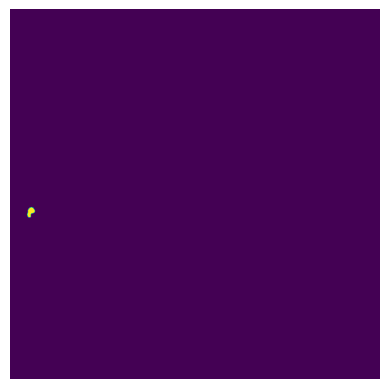

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the file
path = "/home/komal.kumar/Documents/Cell/datasets/celltrack/2D/BF-C2DL-HSC/01_ST/SEG/man_seg0000.tif"

# Open the .tif file
img = Image.open(path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes for better display
plt.show()


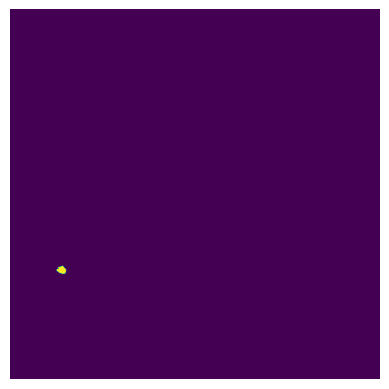

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the file
path = "/home/komal.kumar/Documents/Cell/datasets/celltrack/2D/BF-C2DL-HSC/01_GT/SEG/man_seg0175.tif"

# Open the .tif file
img = Image.open(path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes for better display
plt.show()


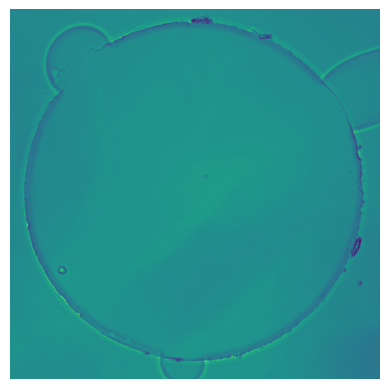

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the file
path = "/home/komal.kumar/Documents/Cell/datasets/celltrack/2D/BF-C2DL-HSC/01/t0175.tif"

# Open the .tif file
img = Image.open(path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes for better display
plt.show()


In [8]:
import os

In [15]:
img = list(os.listdir("/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC/01"))

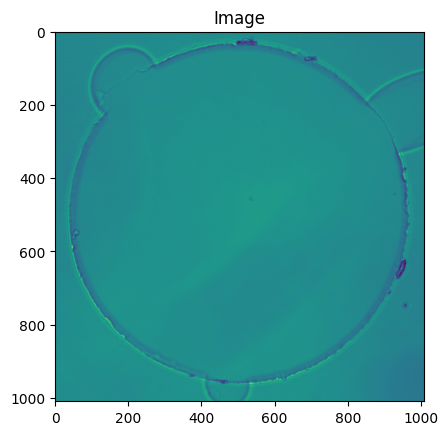

In [29]:
import numpy as np
import matplotlib.pyplot as plt

image_path = "/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC/01/0000.npy"
image_data = np.load(image_path, allow_pickle=True)[0][0]  # Assuming .npy format

plt.imshow(image_data)
plt.title("Image")
plt.show()

In [31]:
image_path = "/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC/01/0000.npy"
image_data = np.load(image_path, allow_pickle=True)

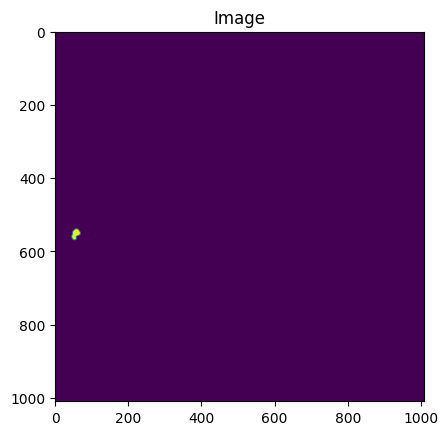

In [36]:
import numpy as np
import matplotlib.pyplot as plt

image_path = "/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC/01/0000.npy"
image_data = np.load(image_path, allow_pickle=True)[1]  # Assuming .npy format

plt.imshow(image_data)
plt.title("Image")
plt.show()

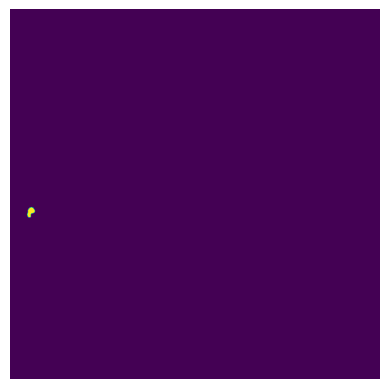

In [37]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the file
path = "/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC/01_GT/SEG/man_seg000.tif"

# Open the .tif file
img = Image.open(path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes for better display
plt.show()


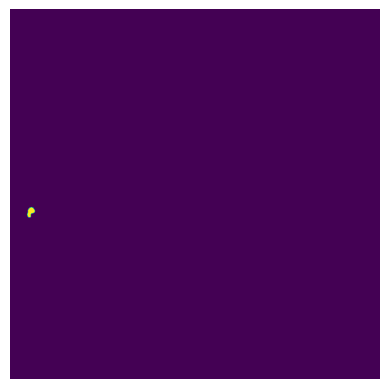

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the file
path = "/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC/01_RES/mask000.tif"

# Open the .tif file
img = Image.open(path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes for better display
plt.show()


In [1]:
import gymnasium as gym
import numpy as np
import torch
from gymnasium import spaces
from torchvision import transforms
from PIL import Image

class TrackingEnv(gym.Env):
    def __init__(self, dataset_path):
        super(TrackingEnv, self).__init__()
        self.dataset_path = dataset_path
        self.current_frame_idx = 0
        self.frames = self.load_images(self.dataset_path)
        
        # Define the action space (continuous actions for velocity vector)
        self.action_space = spaces.Box(low=-1, high=1, shape=(2,), dtype=np.float32)  # Velocity in x, y
        
        # Observation space for current frame, previous frame, and segmentation mask
        self.observation_space = spaces.Dict({
            'current_frame': spaces.Box(low=0, high=255, shape=(256, 256, 3), dtype=np.uint8),
            'previous_frame': spaces.Box(low=0, high=255, shape=(256, 256, 3), dtype=np.uint8),
            'segmentation_mask': spaces.Box(low=0, high=1, shape=(256, 256), dtype=np.uint8)
        })
        
        # Initialize state
        self.current_frame = None
        self.previous_frame = None
        self.segmentation_mask = None
    
    def load_images(self, path):
        # Implement the logic to load your dataset
        # E.g., load frames and segmentation masks from dataset
        pass
    
    def reset(self, ):
        self.current_frame_idx = 0
        self.previous_frame = self.frames[self.current_frame_idx]
        self.current_frame = self.frames[self.current_frame_idx + 1]
        self.segmentation_mask = self.get_segmentation_mask(self.current_frame_idx + 1)
        
        return {
            'current_frame': self.current_frame,
            'previous_frame': self.previous_frame,
            'segmentation_mask': self.segmentation_mask
        }
    
    def get_segmentation_mask(self, idx):
        # Load corresponding segmentation mask from the dataset
        pass
    
    def step(self, action):
        # Update position of the agent based on the action
        velocity_x, velocity_y = action
        done = False
        
        # Update frame index
        self.current_frame_idx += 1
        
        if self.current_frame_idx >= len(self.frames) - 1:
            done = True
        
        # Update frames and segmentation mask
        self.previous_frame = self.current_frame
        self.current_frame = self.frames[self.current_frame_idx]
        self.segmentation_mask = self.get_segmentation_mask(self.current_frame_idx)
        
        # Reward function: Dense reward based on tracking error
        reward = self.calculate_reward()
        
        return {
            'current_frame': self.current_frame,
            'previous_frame': self.previous_frame,
            'segmentation_mask': self.segmentation_mask
        }, reward, done, {}
    
    def calculate_reward(self):
        # Calculate reward based on distance to target and penalties
        reward = 0
        return reward
    
    def render(self, mode='human'):
        pass


In [3]:
# from stable_baselines3 import PPO

# # Instantiate the environment
# env = TrackingEnv(dataset_path="/home/komal.kumar/Documents/Cell/datasets/celltrack/2D/BF-C2DL-HSC")

# # Instantiate the agent
# model = PPO("MultiInputPolicy", env, verbose=1)

# # Train the agent
# model.learn(total_timesteps=100000)

# # Save the trained model
# model.save("ppo_visual_tracking")


In [15]:
import gymnasium as gym
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from skimage.metrics import structural_similarity as ssim
from gymnasium import spaces

# Environment setup
class CellTrackingEnv(gym.Env):
    def __init__(self, data_path):
        super(CellTrackingEnv, self).__init__()
        self.data_path = data_path
        self.current_step = 0
        self.frames, self.masks = self.load_data()
        
        # Set the action space (discrete movement and zooming)
        self.action_space = spaces.Discrete(6)  # Move up/down/left/right, zoom in/out
        self.observation_space = spaces.Dict({
            'image': spaces.Box(low=0, high=255, shape=self.frames[0].shape, dtype=np.uint8),
            'mask': spaces.Box(low=0, high=1, shape=self.masks[0].shape, dtype=np.uint8)
        })
        
        # Load FasterRCNN model for segmentation
        self.model = fasterrcnn_resnet50_fpn(pretrained=True).eval()
        self.transform = T.ToTensor()

    def load_data(self):
        # Load the sequence of .npy files (images and masks)
        data = np.load(self.data_path, allow_pickle=True)
        print(data[0].dtype)
        frames = data[0]  # Assuming 0th channel is image
        masks = data[1]  # Assuming 1st channel is mask
        frames = data[0].astype(np.float32)  # Convert to float32
        masks = data[1].astype(np.float32)  # Convert to float32
        return frames, masks

    def reset(self):
        self.current_step = 0
        self.state = {
            'image': self.frames[self.current_step],
            'mask': self.masks[self.current_step]
        }
        return self.state

    def step(self, action):
        # Take the action (move or zoom)
        self.state = self.apply_action(action)
        
        # Predict new segmentation mask using FasterRCNN
        predicted_mask = self.predict_mask(self.state['image'])
        
        # Calculate reward (based on IOU with ground truth)
        reward = self.calculate_iou_reward(predicted_mask, self.state['mask'])
        
        self.current_step += 1
        done = self.current_step >= len(self.frames)  # End of sequence
        
        return self.state, reward, done, {}

    def apply_action(self, action):
        # Define how each action modifies the state (image, mask)
        image, mask = self.state['image'], self.state['mask']
        if action == 0:  # Move up
            image = np.roll(image, -1, axis=0)
            mask = np.roll(mask, -1, axis=0)
        elif action == 1:  # Move down
            image = np.roll(image, 1, axis=0)
            mask = np.roll(mask, 1, axis=0)
        elif action == 2:  # Move left
            image = np.roll(image, -1, axis=1)
            mask = np.roll(mask, -1, axis=1)
        elif action == 3:  # Move right
            image = np.roll(image, 1, axis=1)
            mask = np.roll(mask, 1, axis=1)
        elif action == 4:  # Zoom in (crop center)
            image = image[10:-10, 10:-10]
            mask = mask[10:-10, 10:-10]
        elif action == 5:  # Zoom out (pad with zeros)
            image = np.pad(image, pad_width=10, mode='constant', constant_values=0)
            mask = np.pad(mask, pad_width=10, mode='constant', constant_values=0)
        
        return {'image': image, 'mask': mask}

    def predict_mask(self, image):
        # Convert image to tensor and use FasterRCNN for segmentation prediction
        img_tensor = self.transform(image).unsqueeze(0)
        with torch.no_grad():
            predictions = self.model(img_tensor)
        # Extract mask from the predictions
        print(predictions)
        pred_mask = predictions[0]['masks'].cpu().numpy()
        pred_mask = np.squeeze(pred_mask > 0.5, axis=0).astype(np.uint8)  # Thresholding for binary mask
        return pred_mask

    def calculate_iou_reward(self, predicted_mask, ground_truth_mask):
        # Calculate Intersection over Union (IOU)
        intersection = np.logical_and(predicted_mask, ground_truth_mask).sum()
        union = np.logical_or(predicted_mask, ground_truth_mask).sum()
        iou = intersection / union if union != 0 else 0
        
        # Reward based on IOU
        if iou > 0.6:
            return 1
        else:
            return -1


# Example usage
data_path = "/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC/01/0000.npy"
env = CellTrackingEnv(data_path)

# Simple testing loop
obs = env.reset()
done = False
total_reward = 0

while not done:
    action = env.action_space.sample()  # Random action for testing
    obs, reward, done, _ = env.step(action)
    total_reward += reward

print(f"Total reward: {total_reward}")


float64
[{'boxes': tensor([[   0.0000,   11.0050, 1010.0001, 1010.0001],
        [   2.6268,    0.0000, 1009.5343, 1007.6273],
        [   0.0000,    5.0967, 1010.0001,  963.2687],
        [ 528.7164,  450.1899,  541.5983,  463.4688],
        [  70.5029,   52.2466,  944.8523,  959.5031],
        [ 528.3541,  450.3377,  541.7675,  463.4100],
        [  40.2053,   41.2823,  968.0387,  952.8290],
        [  33.2718,   48.5307,  995.7811,  982.2418]]), 'labels': tensor([81, 70, 86, 38, 61, 16, 47, 73]), 'scores': tensor([0.4653, 0.2792, 0.1366, 0.1299, 0.0948, 0.0600, 0.0556, 0.0538])}]


KeyError: 'masks'

In [2]:
import gymnasium as gym
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from gymnasium import spaces
import os
import matplotlib.pyplot as plt

# Environment setup
class CellTrackingEnv(gym.Env):
    def __init__(self, data_dir):
        super(CellTrackingEnv, self).__init__()
        self.data_dir = data_dir
        self.current_step = 0
        self.npy_files = self.get_npy_files()  # Get paths to all files but don't load them yet
        
        # Set the action space (discrete movement and zooming)
        self.action_space = spaces.Discrete(6)  # Move up/down/left/right, zoom in/out
        self.observation_space = spaces.Dict({
            'image': spaces.Box(low=0, high=255, shape=(512, 512), dtype=np.uint8),
            'mask': spaces.Box(low=0, high=1, shape=(512, 512), dtype=np.uint8)
        })
        
        # Load MaskRCNN model for segmentation
        self.model = maskrcnn_resnet50_fpn(pretrained=True).eval()
        self.transform = T.ToTensor()

    def get_npy_files(self):
        """Get all .npy file paths from the directory."""
        return sorted([os.path.join(self.data_dir, f) for f in os.listdir(self.data_dir) if f.endswith('.npy')])

    def load_frame_and_mask(self, step):
        """Load a specific frame and mask based on the step index."""
        data_path = self.npy_files[step]
        data = np.load(data_path, allow_pickle=True)
        return data[0][0].astype(np.float32), data[1].astype(np.float32)  # Image and mask

    def reset(self):
        """Reset the environment to the initial state."""
        self.current_step = 0
        self.state = {
            'image': np.zeros((512, 512), dtype=np.float32),  # Placeholder until first step
            'mask': np.zeros((512, 512), dtype=np.float32)
        }
        return self.state

    def step(self, action):
        """Move to the next step, apply action, and get new observation."""
        # Load frame and mask when required
        self.state['image'], self.state['mask'] = self.load_frame_and_mask(self.current_step)
        
        # Visualize before applying action
        # self.visualize(self.state['image'], self.state['mask'], "Before Action")

        # Take the action (move or zoom)
        self.state = self.apply_action(action)
        
        # Visualize after applying action
        # self.visualize(self.state['image'], self.state['mask'], "After Action")
        
        # Predict new segmentation mask using MaskRCNN
        predicted_mask = self.predict_mask(self.state['image'])
        
        # Calculate reward (based on IOU with ground truth)
        reward = self.calculate_iou_reward(predicted_mask, self.state['mask'])
        
        self.current_step += 1

        done = self.current_step >= len(self.npy_files)  # End of sequence
        
        return self.state, reward, done, {}

    def apply_action(self, action):
        """Apply the action to the current image and mask."""
        image, mask = self.state['image'], self.state['mask']        
        # Apply action on the image and mask
        if action == 0:  # Move up
            image = np.roll(image, -1, axis=0)
            mask = np.roll(mask, -1, axis=0)
        elif action == 1:  # Move down
            image = np.roll(image, 1, axis=0)
            mask = np.roll(mask, 1, axis=0)
        elif action == 2:  # Move left
            image = np.roll(image, -1, axis=1)
            mask = np.roll(mask, -1, axis=1)
        elif action == 3:  # Move right
            image = np.roll(image, 1, axis=1)
            mask = np.roll(mask, 1, axis=1)
        elif action == 4:  # Zoom in (crop center)
            image = image[10:-10, 10:-10]
            mask = mask[10:-10, 10:-10]
        elif action == 5:  # Zoom out (pad with zeros)
            image = np.pad(image, pad_width=10, mode='constant', constant_values=0)
            mask = np.pad(mask, pad_width=10, mode='constant', constant_values=0)
        
        return {'image': image, 'mask': mask}

    def predict_mask(self, image):
        """Use MaskRCNN to predict the segmentation mask."""
        img_tensor = self.transform(image).unsqueeze(0)
        with torch.no_grad():
            predictions = self.model(img_tensor)
        pred_masks = predictions[0]['masks'].cpu().numpy()
        pred_mask = np.squeeze(pred_masks[0] > 0.5, axis=0).astype(np.uint8)
        return pred_mask

    def calculate_iou_reward(self, predicted_mask, ground_truth_mask):
        """Calculate Intersection over Union (IOU) and return reward."""
        intersection = np.logical_and(predicted_mask, ground_truth_mask).sum()
        union = np.logical_or(predicted_mask, ground_truth_mask).sum()
        iou = intersection / union if union != 0 else 0
        return 1 if iou > 0.2 else -1

    def visualize(self, image, mask, title):
        """Visualize the image and mask before and after actions."""
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(image, cmap='gray')
        axes[0].set_title(f"{title}: Image")
        axes[1].imshow(mask, cmap='gray')
        axes[1].set_title(f"{title}: Mask")
        plt.show()

# Example usage
data_dir = "/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC/01/"
env = CellTrackingEnv(data_dir)

# Simple testing loop
obs = env.reset()
done = False
total_reward = 0

# while not done:
action = env.action_space.sample()  # Random action for testing
obs, reward, done, _ = env.step(action)
total_reward += reward
print("Action: ", action)
print(f"Total reward: {total_reward}")


/home/komal.kumar/miniconda3/envs/cell/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/komal.kumar/miniconda3/envs/cell/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Action:  0
Total reward: -1


In [3]:
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from gymnasium import spaces
import os

class CellTrackingEnv(gym.Env):
    def __init__(self, data_dir):
        super(CellTrackingEnv, self).__init__()
        self.data_dir = data_dir
        self.current_step = 0
        self.frames, self.masks = self.load_data_from_dir()

        # Action space is now the mask prediction
        self.action_space = spaces.Box(low=0, high=1, shape=self.masks[0].shape, dtype=np.uint8)
        self.observation_space = spaces.Box(low=0, high=255, shape=self.frames[0].shape, dtype=np.uint8)

        # Load MaskRCNN model for predicting segmentation masks
        self.model = maskrcnn_resnet50_fpn(pretrained=True).eval()
        self.transform = T.ToTensor()

    def load_data_from_dir(self):
        """Load all .npy files from the specified directory."""
        frame_list = []
        mask_list = []
        npy_files = sorted([f for f in os.listdir(self.data_dir) if f.endswith('.npy')])

        for npy_file in npy_files:
            data_path = os.path.join(self.data_dir, npy_file)
            data = np.load(data_path, allow_pickle=True)
            frame_list.append(data[0].astype(np.float32))  # Image
            mask_list.append(data[1].astype(np.float32))   # Ground truth mask

        return frame_list, mask_list

    def reset(self):
        """Reset the environment to the initial state."""
        self.current_step = 0
        self.state = self.frames[self.current_step]
        return self.state

    def step(self, predicted_mask):
        """Compare predicted mask with the ground truth mask, calculate reward."""
        # Get the ground truth mask for the current step
        gt_mask = self.masks[self.current_step]

        # Calculate the reward based on IoU
        reward = self.calculate_iou_reward(predicted_mask, gt_mask)

        # Move to the next frame
        self.current_step += 1
        done = self.current_step >= len(self.frames)  # End of sequence

        # Update the state to the next image
        if not done:
            self.state = self.frames[self.current_step]

        return self.state, reward, done, {}

    def calculate_iou_reward(self, pred_mask, gt_mask):
        """Calculate Intersection over Union (IoU) and return reward."""
        intersection = np.logical_and(pred_mask, gt_mask).sum()
        union = np.logical_or(pred_mask, gt_mask).sum()
        iou = intersection / union if union != 0 else 0
        return 1 if iou > 0.5 else -1  # Positive or negative reward based on IoU threshold

    def predict_mask(self, image):
        """Use MaskRCNN to predict the segmentation mask."""
        img_tensor = self.transform(image).unsqueeze(0)
        with torch.no_grad():
            predictions = self.model(img_tensor)
        pred_masks = predictions[0]['masks'].cpu().numpy()
        pred_mask = np.squeeze(pred_masks[0] > 0.5, axis=0).astype(np.uint8)
        return pred_mask

# Example usage
data_dir = "/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC/01/"
env = CellTrackingEnv(data_dir)

obs = env.reset()
done = False
total_reward = 0

# while not done:
# Predict the mask using the model (action)
predicted_mask = env.predict_mask(obs)
obs, reward, done, _ = env.step(predicted_mask)
total_reward += reward

print(f"Total reward: {total_reward}")


In [ ]:
from stable_baselines3 import PPO

# Instantiate the environment
env = TrackingEnv(dataset_path="/home/komal.kumar/Documents/Cell/datasets/pre/GT+ST/BF-C2DL-HSC", device='cuda')

# Instantiate the agent
model = PPO("MultiInputPolicy", env, verbose=1)

# Train the agent
model.learn(total_timesteps=100000)

# Save the trained model
model.save("ppo_visual_tracking_with_frcnn")
